In [1]:
from ml_config import *

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
target = iris.target
target = target[target!=0]

In [5]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
len(target)

100

In [10]:
target[target==1] = 0
target[target==2] = 1

In [7]:
data = iris.data

In [8]:
data = data[50:]

In [14]:
df = pd.DataFrame(columns=['sl','sw','pl','pw'])

In [23]:
sl = [each[0] for each in data]
sw = [each[1] for each in data]
pl = [each[2] for each in data]
pw = [each[3] for each in data]

In [25]:
df['sl'] = sl
df['sw'] = sw
df['pl'] = pl
df['pw'] = pw
df['kind'] = target

In [26]:
model = sm.Logit.from_formula("kind ~ sl + sw + pl + pw",data=df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   kind   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.9142
Time:                        15:54:10   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.6378     25.708     -1.659      0.097     -93.024       7.748
sl            -2.4652      2.394     -1.030      0.303      -7.158       2.228
sw            -6.6809      4.480     -1.491      0.136     -15.461       2.099
pl             9.4294      4.737      1.990      0.047       0.145      18.714
pw            18.2861      9.743      1.877      0.061      -0.809      37.381
==============================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [27]:
from sklearn.metrics import *
df['z'] = result.predict(df)
df['y_hat'] = df['z'].apply(lambda x: 1 if x>=0.5 else 0)

In [28]:
target_names = ['versicolor','virginica']
cls_matrix = classification_report(df['kind'], df['y_hat'], target_names=target_names)

In [29]:
print(cls_matrix)

             precision    recall  f1-score   support

 versicolor       0.98      0.98      0.98        50
  virginica       0.98      0.98      0.98        50

avg / total       0.98      0.98      0.98       100



In [30]:
cfs_matrix = confusion_matrix(df['kind'], df['y_hat'])

In [31]:
cfs_matrix

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [ ]:
## from sklearn.linear_model import LogisticRegression
tmp = np.array([[1]+each for each iyn data])
model1 = LogisticRegression().fit(tmp, target)
fpr1, tpr1, thresholds1 = roc_curve(target, model1.decision_function(tmp))

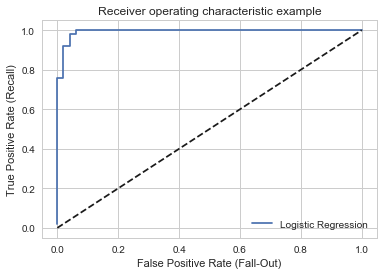

In [39]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [40]:
auc(fpr1,tpr1)

0.99319999999999997